In [118]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
import numpy as np
from scipy.signal import butter, filtfilt, welch, csd, windows
from scipy.interpolate import interp1d
from scipy.io import savemat

In [119]:
# Importing data from cache file
cache_filename = r'C:\Users\prife\OneDrive - KTH\KTH\01 Courses\Signal Processing\Project\d4697bf6e389c57c31a69abd149a8c40.cache'
with open(cache_filename, 'rb') as file_cache:
    data = pickle.load(file_cache)

key_acc_B1WS1_R_y = 'result__GAccelerometers__RSB1WS1R__Accelerationiny'
key_irreg_y_B1WS1 = 'result__SB1__SWS1__RSRWPRight__RSRWPRightPair__yirregLateralrailirregularity'

time = data['time']
acc_B1WS1_R_y = np.array(data[key_acc_B1WS1_R_y])
irreg_y_B1_WS1 = np.array(data[key_irreg_y_B1WS1])

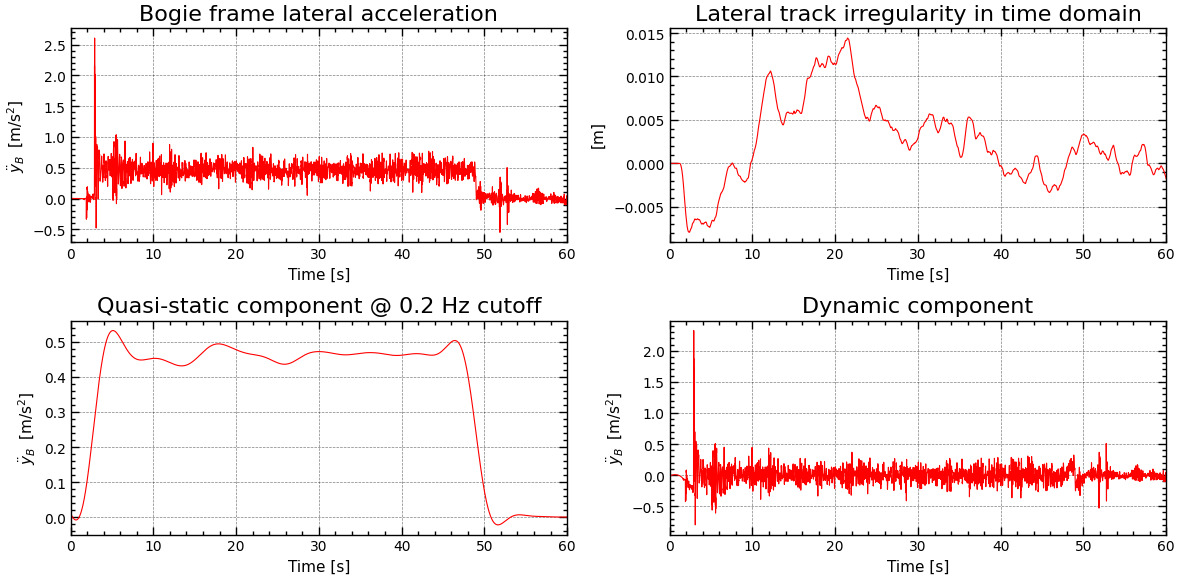

In [123]:
# Plotting raw signal
idx = 0
plt.style.use(['science', 'notebook', 'grid'])
matplotlib.rcParams['axes.prop_cycle'] = plt.cycler(
        color=['red', 'blue'] + plt.rcParams['axes.prop_cycle'].by_key()['color'][2:])

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs.ravel()[idx].plot(time, acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_xlabel(r'Time [s]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs.ravel()[idx].set_title(f'Bogie frame lateral acceleration')
axs.ravel()[idx].set_xlim(0, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)


# Plotting quasi-static component
idx = 2
cutoff_f = 0.2  # Hz
normalized_cutoff = cutoff_f / (0.5 * 250)
[b, a] = butter(4, normalized_cutoff, btype='low', analog=False)
QS_acc_B1WS1_R_y = filtfilt(b, a, acc_B1WS1_R_y)

axs.ravel()[idx].plot(time, QS_acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_xlabel(r'Time [s]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs.ravel()[idx].set_title(f'Quasi-static component @ {cutoff_f} Hz cutoff')
axs.ravel()[idx].set_xlim(0, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)


# Plotting just the dynamic component
idx = 3
DYN_acc_B1WS1_R_y = acc_B1WS1_R_y - QS_acc_B1WS1_R_y

axs.ravel()[idx].plot(time, DYN_acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_xlabel(r'Time [s]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs.ravel()[idx].set_title(f'Dynamic component')
axs.ravel()[idx].set_xlim(0, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)


# Plotting irregularity
idx = 1
axs.ravel()[idx].plot(time, irreg_y_B1_WS1, label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_xlabel(r'Time [s]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\mathrm{[m]}$', fontsize=11)
axs.ravel()[idx].set_title(f'Lateral track irregularity in time domain')
axs.ravel()[idx].set_xlim(0, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)

plt.tight_layout()  # Adjust spacing between subplots
# plt.subplots_adjust(hspace=0.3)  # Increase vertical space

plt.show()

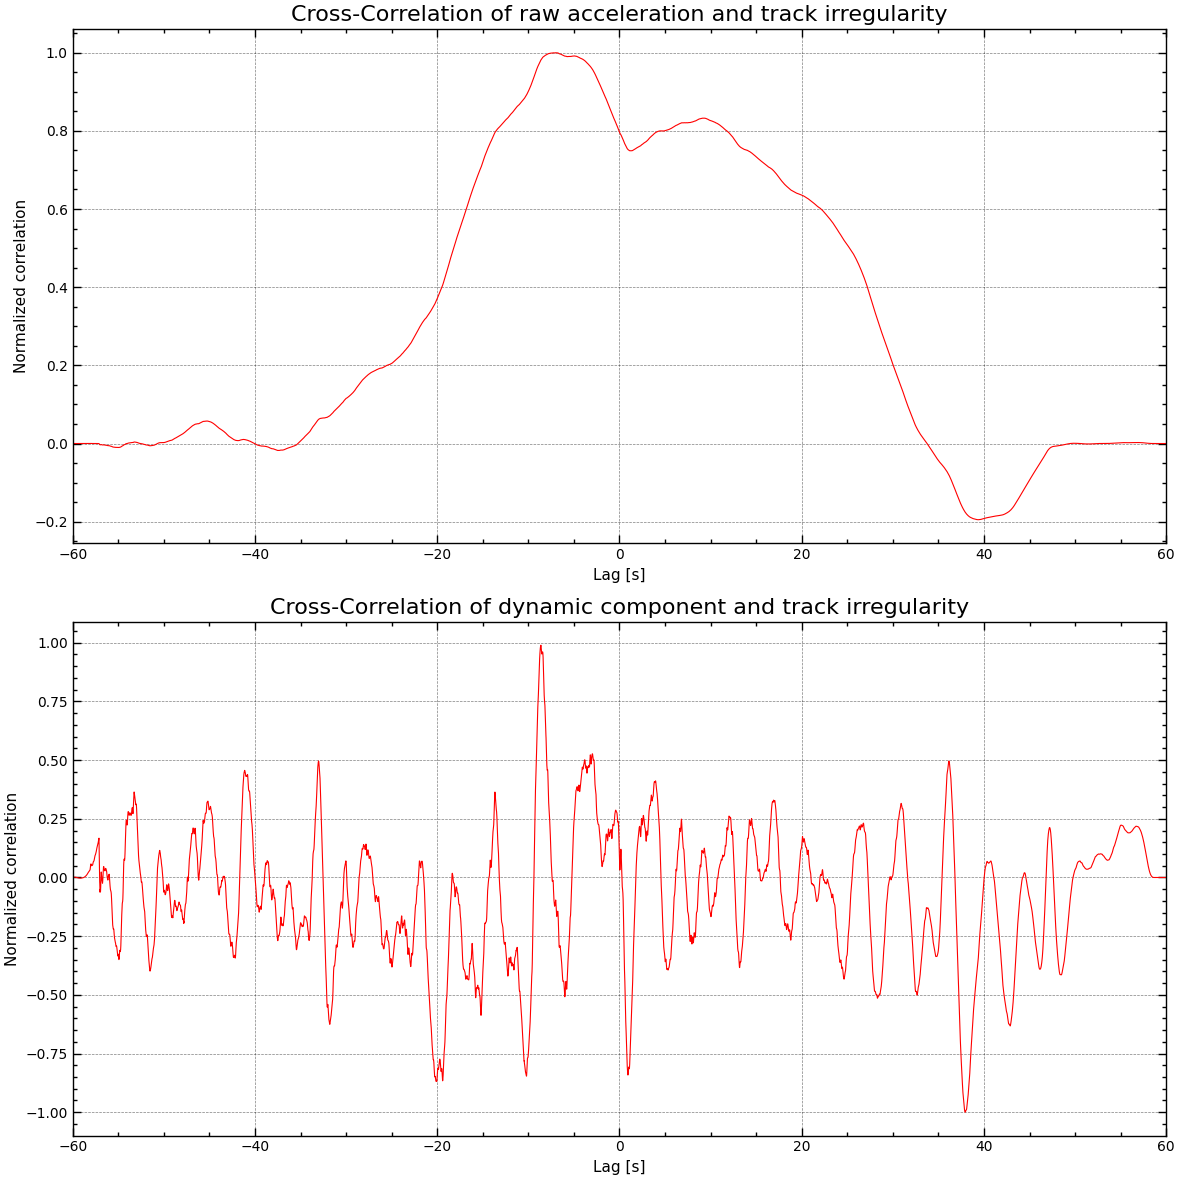

In [58]:
# Plotting the cross-correlation
# Raw signal
idx = 0
cross_corr_B1_WS1 = np.correlate(acc_B1WS1_R_y, irreg_y_B1_WS1, mode='full')
cross_corr_B1_WS1 /= np.max(np.abs(cross_corr_B1_WS1))
lags_B1_WS1 = np.arange(-len(acc_B1WS1_R_y) + 1, len(acc_B1WS1_R_y)) / 250


fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs.ravel()[idx].plot(lags_B1_WS1, cross_corr_B1_WS1,label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_title('Cross-Correlation of raw acceleration and track irregularity')
axs.ravel()[idx].set_xlim(-60, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
axs.ravel()[idx].set_xlabel(r'Lag [s]', fontsize=11)
axs.ravel()[idx].set_ylabel('Normalized correlation', fontsize=11)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)


# Dynamic component
idx = 1
cross_corr_B1_WS1_dyn = np.correlate(DYN_acc_B1WS1_R_y, irreg_y_B1_WS1, mode='full')
cross_corr_B1_WS1_dyn /= np.max(np.abs(cross_corr_B1_WS1_dyn))
lags_B1_WS1_dyn = np.arange(-len(DYN_acc_B1WS1_R_y) + 1, len(DYN_acc_B1WS1_R_y)) / 250

axs.ravel()[idx].plot(lags_B1_WS1_dyn, cross_corr_B1_WS1_dyn,label='Bogie 1 - WS 1', lw=0.8)
axs.ravel()[idx].set_title('Cross-Correlation of dynamic component and track irregularity')
axs.ravel()[idx].set_xlim(-60, 60)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
axs.ravel()[idx].set_xlabel(r'Lag [s]', fontsize=11)
axs.ravel()[idx].set_ylabel('Normalized correlation', fontsize=11)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)

plt.tight_layout()
plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


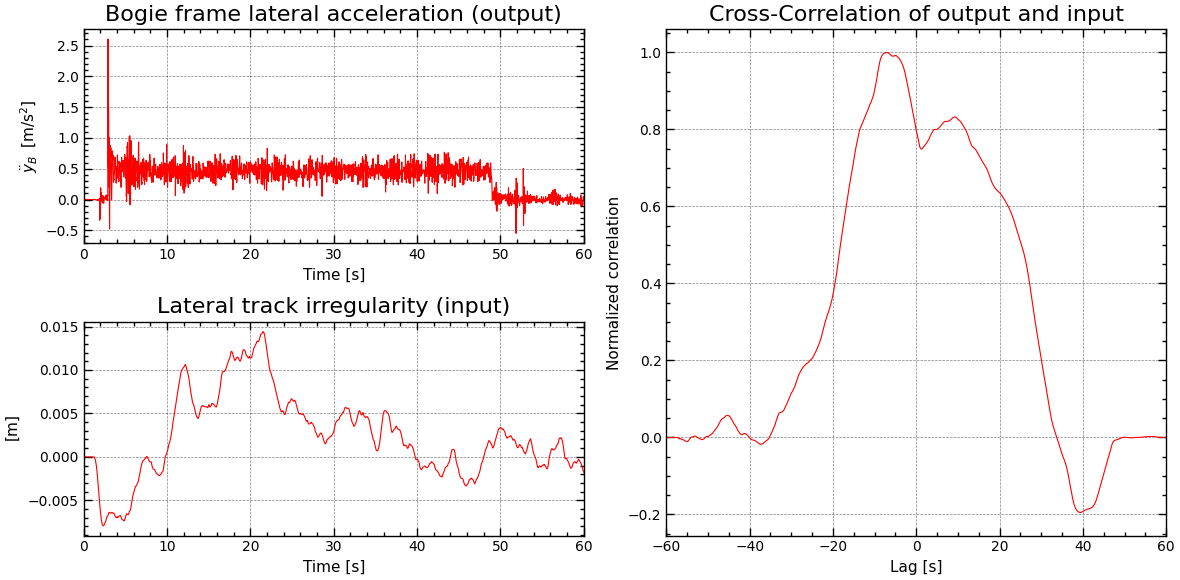

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

# Raw signal (top left)
axs[0, 0].plot(time, acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs[0, 0].set_xlabel(r'Time [s]', fontsize=11)
axs[0, 0].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs[0, 0].set_title('Bogie frame lateral acceleration (output)')
axs[0, 0].set_xlim(0, 60)
axs[0, 0].tick_params(axis='both', labelsize=10)

# Input (bottom left)
axs[1, 0].plot(time, irreg_y_B1_WS1, label='Bogie 1 - WS 1', lw=0.8)
axs[1, 0].set_xlabel(r'Time [s]', fontsize=11)
axs[1, 0].set_ylabel(r'$\mathrm{[m]}$', fontsize=11)
axs[1, 0].set_title('Lateral track irregularity (input)')
axs[1, 0].set_xlim(0, 60)
axs[1, 0].tick_params(axis='both', labelsize=10)

axs[0, 1].remove()
axs[1, 1].remove()

# Correlation (right side spanning two rows)
axs_corr = fig.add_subplot(1, 2, 2)  # Create a new subplot that spans the second column
axs_corr.plot(lags_B1_WS1, cross_corr_B1_WS1, label='Bogie 1 - WS 1', lw=0.8)
axs_corr.set_title('Cross-Correlation of output and input')
axs_corr.set_xlim(-60, 60)
axs_corr.tick_params(axis='both', labelsize=10)
axs_corr.set_xlabel(r'Lag [s]', fontsize=11)
axs_corr.set_ylabel('Normalized correlation', fontsize=11)

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('prj_1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


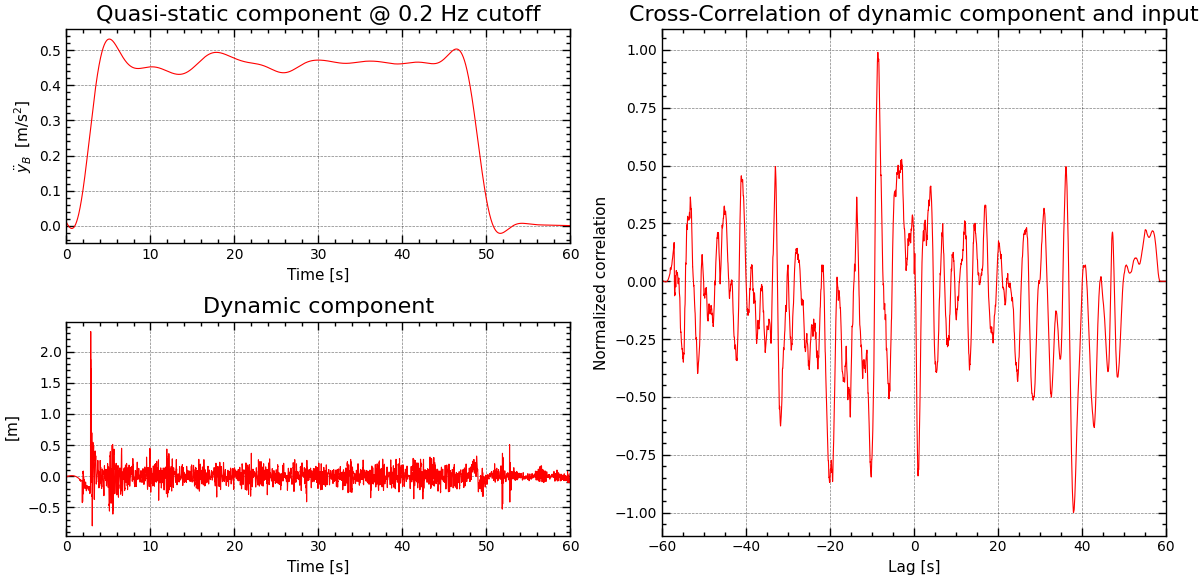

In [136]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})

# Raw signal (top left)
axs[0, 0].plot(time, QS_acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs[0, 0].set_xlabel(r'Time [s]', fontsize=11)
axs[0, 0].set_ylabel(r'$\ddot{y}_{B} \; \; \mathrm{[m/s^2]}$', fontsize=11)
axs[0, 0].set_title(f'Quasi-static component @ {cutoff_f} Hz cutoff')
axs[0, 0].set_xlim(0, 60)
axs[0, 0].tick_params(axis='both', labelsize=10)

# Input (bottom left)
axs[1, 0].plot(time, DYN_acc_B1WS1_R_y, label='Bogie 1 - WS 1', lw=0.8)
axs[1, 0].set_xlabel(r'Time [s]', fontsize=11)
axs[1, 0].set_ylabel(r'$\mathrm{[m]}$', fontsize=11)
axs[1, 0].set_title('Dynamic component')
axs[1, 0].set_xlim(0, 60)
axs[1, 0].tick_params(axis='both', labelsize=10)

axs[0, 1].remove()
axs[1, 1].remove()

# Correlation (right side spanning two rows)
axs_corr = fig.add_subplot(1, 2, 2)  # Create a new subplot that spans the second column
axs_corr.plot(lags_B1_WS1_dyn, cross_corr_B1_WS1_dyn, label='Bogie 1 - WS 1', lw=0.8)
axs_corr.set_title('Cross-Correlation of dynamic component and input')
axs_corr.set_xlim(-60, 60)
axs_corr.tick_params(axis='both', labelsize=10)
axs_corr.set_xlabel(r'Lag [s]', fontsize=11)
axs_corr.set_ylabel('Normalized correlation', fontsize=11)

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('prj_2.eps', format='eps')
plt.show()

In [55]:
max_corr_indexB1_WS1 = np.argmax(cross_corr_B1_WS1)
lag_at_max_corr_B1_WS1 = lags_B1_WS1[max_corr_indexB1_WS1]

print(max_corr_indexB1_WS1)
print(lag_at_max_corr_B1_WS1)

13250
-7.0


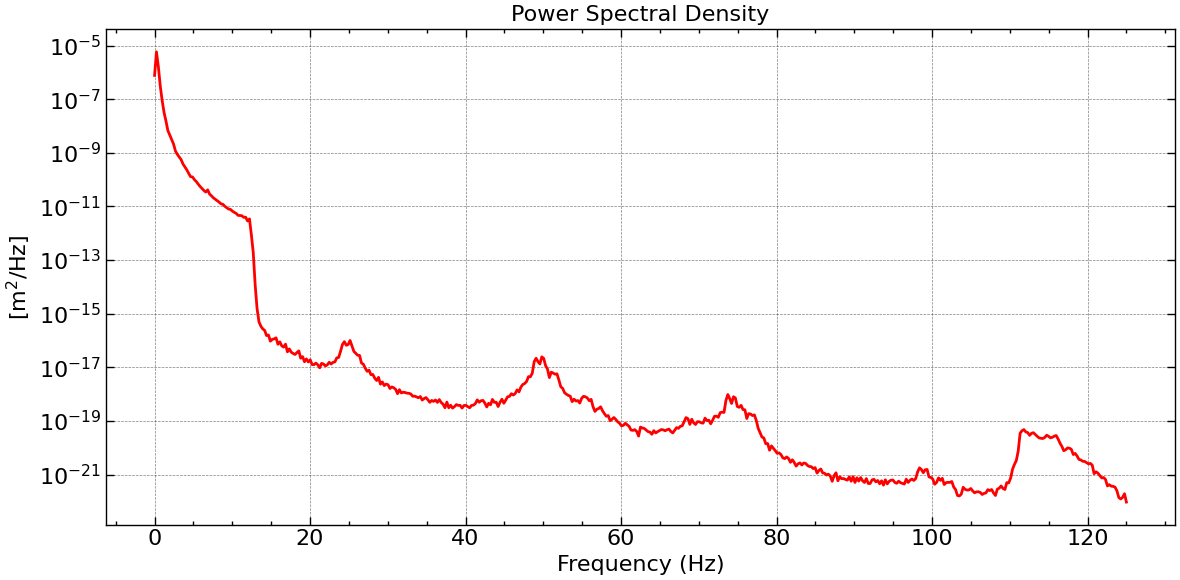

In [91]:
# PSD of irregularity
# Welch method
#############

# Define Welch parameters
overlap_factor = 0.5  # 50% overlap
nfft = 1024

# Calculate and plot PSD
plt.figure(figsize=(12, 6))
window = np.hanning(nfft)  # Hanning window
overlap = int(nfft * overlap_factor)  # 50% overlap
f_irreg, psd_irreg = welch(irreg_y_B1_WS1, fs=250, window=window, nperseg=nfft, noverlap=overlap, scaling='density')

# Plot
plt.semilogy(f_irreg, psd_irreg, label=f'Track irregularity, NFFT = {nfft}')
plt.title(f"Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$\mathrm{[m^2/Hz]}$')
plt.grid(True)

plt.tight_layout()
plt.show()

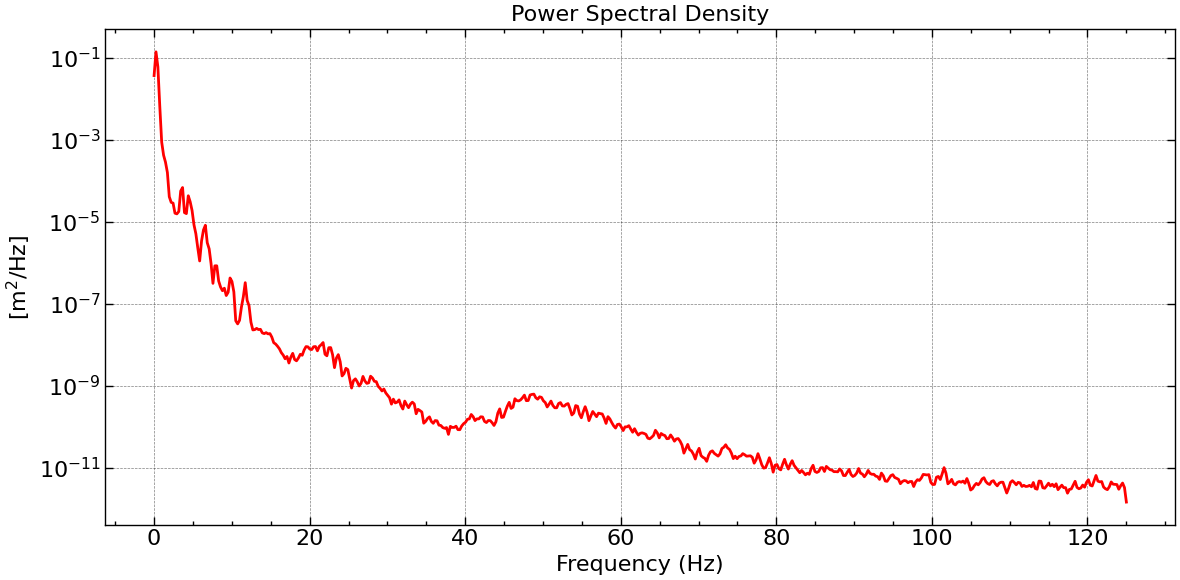

In [92]:
# PSD of correlation
# Welch method
#############

# Define Welch parameters
overlap_factor = 0.5  # 50% overlap
nfft = 1024

# Calculate and plot PSD
plt.figure(figsize=(12, 6))
window = np.hanning(nfft)  # Hanning window
overlap = int(nfft * overlap_factor)  # 50% overlap
f_corr, psd_corr = welch(cross_corr_B1_WS1_dyn, fs=250, window=window, nperseg=nfft, noverlap=overlap, scaling='density')

# Plot
plt.semilogy(f_corr, psd_corr, label=f'Track irregularity, NFFT = {nfft}')
plt.title(f"Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$\mathrm{[m^2/Hz]}$')
plt.grid(True)

plt.tight_layout()
plt.show()


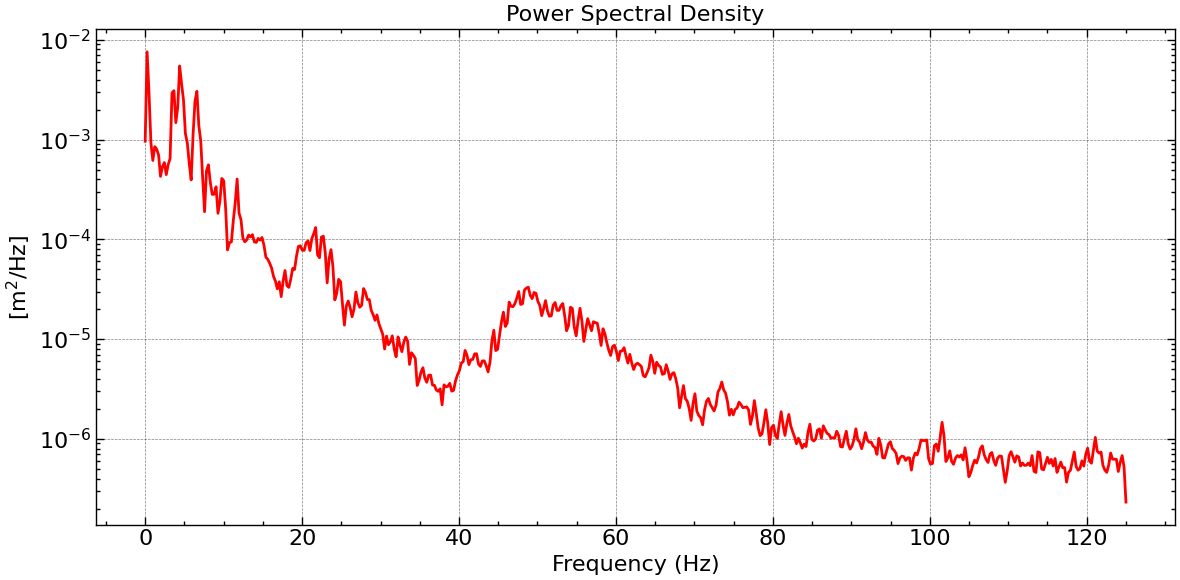

In [93]:
# PSD of acceleration
#############

# Define Welch parameters
overlap_factor = 0.5  # 50% overlap
nfft = 1024

# Calculate and plot PSD
plt.figure(figsize=(12, 6))
window = np.hanning(nfft)  # Hanning window
overlap = int(nfft * overlap_factor)  # 50% overlap
f_acc, psd_acc = welch(acc_B1WS1_R_y, fs=250, window=window, nperseg=nfft, noverlap=overlap, scaling='density')

# Plot
plt.semilogy(f_acc, psd_acc, label=f'Track irregularity, NFFT = {nfft}')
plt.title(f"Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$\mathrm{[m^2/Hz]}$')
plt.grid(True)

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


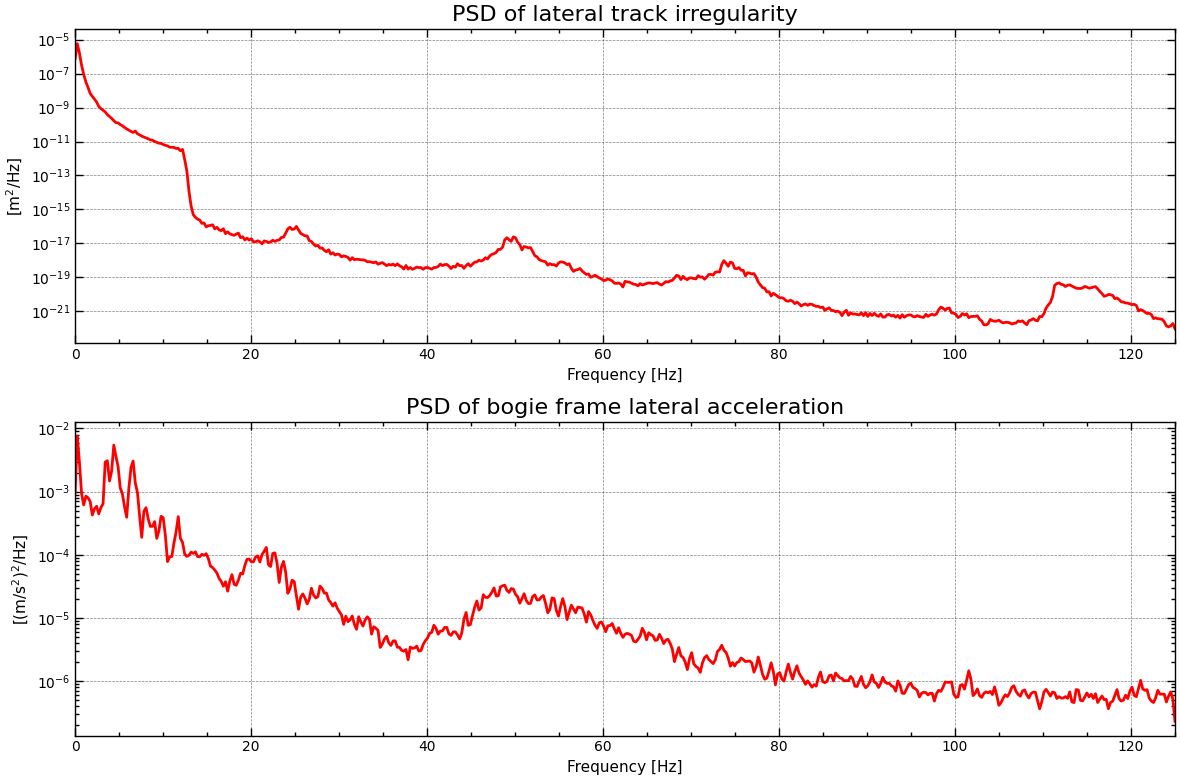

In [137]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Irregularity
idx = 0
axs.ravel()[idx].semilogy(f_irreg, psd_irreg, label=f'Track irregularity, NFFT = {nfft}')
axs.ravel()[idx].set_title('PSD of lateral track irregularity')
axs.ravel()[idx].set_xlim(0, 125)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
axs.ravel()[idx].set_xlabel(r'Frequency [Hz]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\mathrm{[m^2/Hz]}$', fontsize=11)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)


# Dynamic component
idx = 1
axs.ravel()[idx].semilogy(f_acc, psd_acc)
axs.ravel()[idx].set_title('PSD of bogie frame lateral acceleration')
axs.ravel()[idx].set_xlim(0, 125)
axs.ravel()[idx].tick_params(axis='both', labelsize=10)
axs.ravel()[idx].set_xlabel(r'Frequency [Hz]', fontsize=11)
axs.ravel()[idx].set_ylabel(r'$\mathrm{[(m/s^2)^2/Hz]}$', fontsize=11)
# axs.ravel()[idx].legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, ncol=1)

plt.tight_layout()
plt.savefig('prj_3.eps', format='eps')
plt.show()

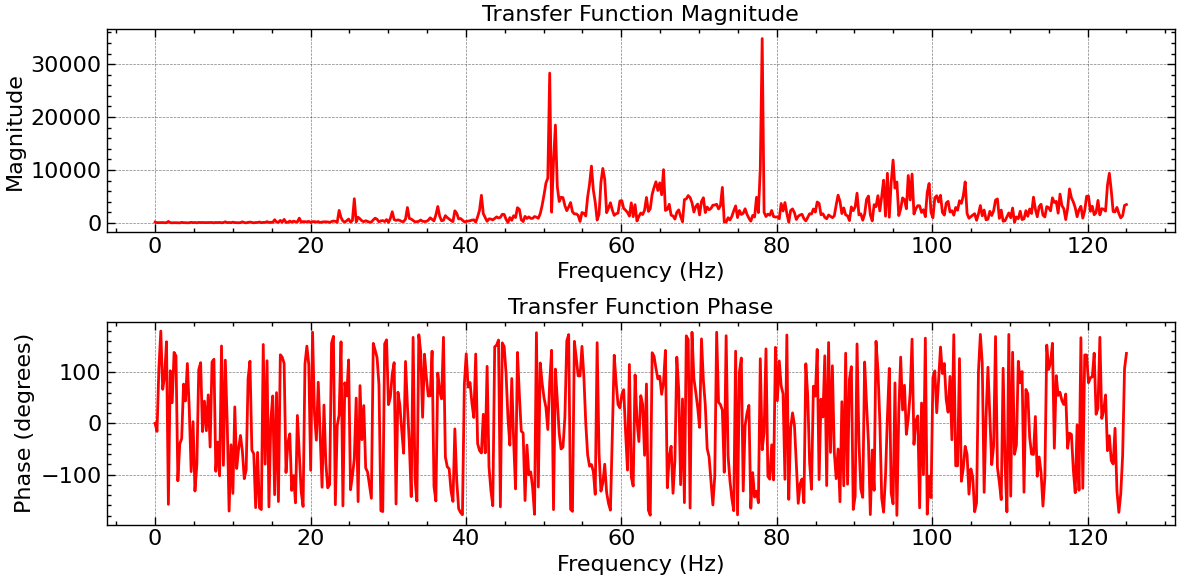

In [100]:
# transfer function

# Compute the FFT of both signals
input_fft = np.fft.rfft(irreg_y_B1_WS1)
output_fft = np.fft.rfft(acc_B1WS1_R_y)
freqs = np.fft.rfftfreq(nfft, d=1/250)

# Calculate the Transfer Function (H(f) = Y(f) / X(f))
transfer_function = output_fft / input_fft

# Compute the magnitude and phase
magnitude = np.abs(transfer_function)
phase = np.angle(transfer_function)

# Plot the magnitude and phase
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.plot(freqs[:len(freqs)], magnitude[:len(freqs)])
plt.title('Transfer Function Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Phase plot
plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs)], np.degrees(phase[:len(freqs)]))
plt.title('Transfer Function Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()




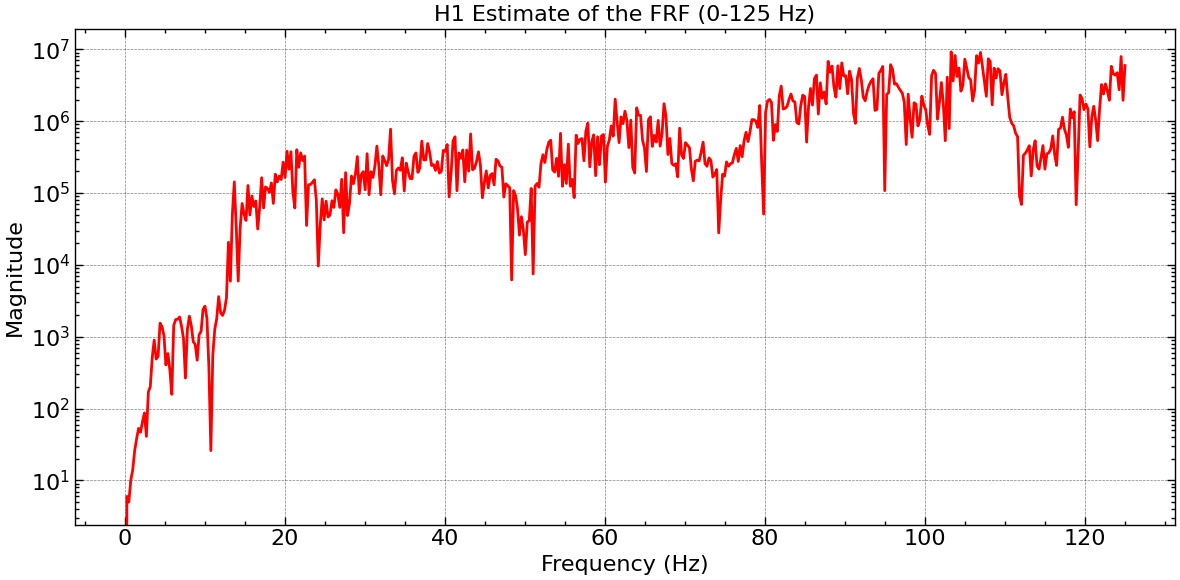

In [117]:
# Parameters for the FRF calculation
nfft = 1024
window = windows.hann(nfft)  # Hanning window
overlap = nfft // 2  # 50% overlap

# Input and output signals (replace with your actual signals)
input_signal = irreg_y_B1_WS1
output_signal = acc_B1WS1_R_y

# Step 1: Calculate the H1 estimate of the FRF
# Cross-spectral density (CSD) of output and input
f, Pxy = csd(output_signal, input_signal, fs=250, window=window, nperseg=nfft, noverlap=overlap)
# Power spectral density (PSD) of input
_, Pxx = welch(input_signal, fs=250, window=window, nperseg=nfft, noverlap=overlap)

# H1 estimate: Pxy / Pxx
H1 = Pxy / Pxx

# Step 2: Calculate the H2 estimate of the FRF
# Power spectral density (PSD) of output
_, Pyy = welch(output_signal, fs=250, window=window, nperseg=nfft, noverlap=overlap)

# H2 estimate: Pxy / Pyy
H2 = Pxy / Pyy

# Limit the frequency range to 0-2000 Hz
freq_limit = 125  # Hz
freq_indices = f <= freq_limit
f_limited = f[freq_indices]  # Limited frequency vector
H1_limited = H1[freq_indices]  # Corresponding H1 values within 0-2000 Hz
H2_limited = H2[freq_indices]  # Corresponding H2 values within 0-2000 Hz

# Plot the FRF magnitude for H1 and H2
plt.figure(figsize=(12, 6))

plt.semilogy(f_limited, (np.abs(H2_limited) + np.abs(H1_limited))//2)
plt.title('H1 Estimate of the FRF (0-125 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()